## Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pull the DataFrame 

In [2]:
df = pd.read_csv('data/pgaTourData.csv')
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


## Description of the Data

- **Player Name**: Name of the golfer
- **Rounds**: The number of games that a player played
- **Fairway Percentage**: The percentage of time a tee shot lands on the fairway
- **Year**: The year in which the statistic was collected
- **Avg Distance**: The average distance of the tee-shot
- **gir**: (Green in Regulation) is met if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par
- **Average Putts**: The average number of strokes taken on the green
- **Average Scrambling**: Scrambling is when a player misses the green in regulation, but still makes par or better on a hole
- **Average Score**: Average Score is the average of all the scores a player has played in that year
- **Points**: The number of FedExCup points a player earned in that year. These points can be earned by competing in tournaments.
- **Wins**: The number of competition a player has won in that year
- **Top 10**: The number of competitions where a player has placed in the Top 10
- **Average SG Putts**: Strokes gained: putting measures how many strokes a player gains (or loses) on the greens.
- **Average SG Total**: The Off-the-tee + approach-the-green + around-the-green + putting statistics combined
- **SG:OTT**: Strokes gained: off-the-tee measures player performance off the tee on all par-4s and par-5s.
- **SG:APR**: Strokes gained: approach-the-green measures player performance on approach shots. Approach shots include all shots that are not from the tee on par-4 and par-5 holes and are not included in strokes gained: around-the-green and strokes gained: putting. Approach shots include tee shots on par-3s.
- **SG:ARG**: Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.
- **Money**: The amount of prize money a player has earned from tournaments.

In [3]:
# View the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [4]:
# Find any null values in the dataset
df.isna().sum()

Player Name              0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top 10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

In [5]:
# Remove all commas and $ from 'Money' column and then assign to float dtype
df['Money'] = df['Money'].str.replace(',', '').str.replace('$', '').astype(float)
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9165.0


In [6]:
# Replace NaN with 0 in Top 10
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,9165.0


In [7]:
# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,9165.0


In [8]:
# Drop NaN values
df.dropna(axis = 0, inplace=True)

# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,"1,629",1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0


In [9]:
# Change Points to int
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0


In [10]:
# Insert underscores to column names where needed and lowercase all columns
df.columns=df.columns.str.replace(' ', '_').str.lower()
df

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0


<AxesSubplot:>

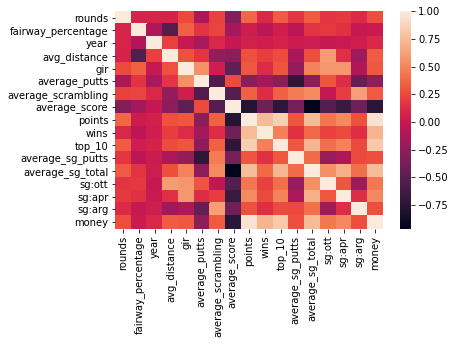

In [11]:
# Import Seaborn and look at correlations for dataset
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

In [12]:
# Create 'winners' column - anyone with wins gets a 1; anyone without wins gets a 0.
df['winners'] = df['wins'].apply(lambda x: 1 if x > 0 else 0)
df

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,winners
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0,1
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0,0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0,0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0,0


In [13]:
# Strongest correlation with 'winners'
df.corr()['winners'].sort_values(ascending=False).abs()

winners               1.000000
wins                  0.887289
points                0.655472
money                 0.609677
top_10                0.423576
average_sg_total      0.329481
sg:apr                0.218768
sg:ott                0.210853
avg_distance          0.175860
rounds                0.134702
average_sg_putts      0.123551
sg:arg                0.106644
average_scrambling    0.091628
gir                   0.082389
year                  0.031866
fairway_percentage    0.034002
average_putts         0.147468
average_score         0.337001
Name: winners, dtype: float64

## Create Models for 'winners'

In [14]:
# Import tools you'll need for models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

## Data Preparation

- Dropped 'wins' column because we used it to create 'winners' column.
- Dropped 'points' column because Cameron will create models based on points.
- Dropped 'money' column because Elliott will create models based on money.
- Dropped 'player_name' column because it's a string.

In [15]:
# Target
y = df['winners']
# Features
X = df.drop(['winners', 'wins', 'points', 'player_name'], axis=1)

### Train-Test-Split (Testing Data, Training Data, Validation Data)

In [16]:
# Initial Train-Test Split for Testing Data
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.25, random_state=2021)

In [17]:
# Train-Test-Split for Training Data and Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.25, random_state=2021)

### Check null values for training data and validation data

In [18]:
# Check again for null values
X_train.isna().sum().sum()

0

In [19]:
# Check again for null values
X_val.isna().sum().sum()

0

### Pull all numerical columns from dataset

In [20]:
# Select only numerical columns
num_cols = list(X.select_dtypes('number').columns)
num_cols

['rounds',
 'fairway_percentage',
 'year',
 'avg_distance',
 'gir',
 'average_putts',
 'average_scrambling',
 'average_score',
 'top_10',
 'average_sg_putts',
 'average_sg_total',
 'sg:ott',
 'sg:apr',
 'sg:arg',
 'money']

## Scale the dataset so the data's distribution will even out.

In [21]:
# Instantiate and Fit StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

# Transform and Convert to DataFrame
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [22]:
X_train_scaled.head()

,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,-0.684984,-0.101855,-0.770559,-0.311261,-1.173098,-0.770468,0.396620,0.625337,-0.649867,0.801783,-0.435374,0.177094,-1.898297,0.370167,-0.801015
1,-1.829233,0.072940,1.150734,-1.114711,0.135303,-1.246258,1.747647,-1.240054,0.807300,1.574632,1.019142,-0.927079,1.110958,1.327098,0.109749
2,-0.756500,0.418557,-1.539077,-0.560218,0.168196,0.866253,0.025749,0.702155,-0.164144,-0.922042,-1.025317,-0.707304,-0.252856,-0.115101,-0.222872
3,-0.184375,0.611229,1.150734,0.333761,-0.164386,-0.998847,0.096391,0.015135,-0.164144,0.327731,-0.130231,0.817885,-0.555346,-1.366821,-0.564780
4,0.602296,0.507941,-1.539077,0.299813,1.546038,0.618841,-0.047836,-0.873354,-0.164144,-0.255496,1.100514,1.125041,1.142250,-0.074284,1.020328


In [23]:
X_val_scaled.head()

,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,1.031390,-0.379937,-0.770559,0.130070,0.332660,-0.009202,0.058127,-0.028347,0.807300,-0.628992,0.121149,-0.018850,0.957105,-0.264763,-0.195059
1,0.673812,1.097873,-1.539077,0.141386,1.600859,1.513328,0.646810,-0.086324,0.321578,-1.149012,0.032512,1.649325,-0.049457,-0.831665,-0.426263
2,-0.828015,-0.451444,0.766476,0.254548,-0.829551,-0.789499,0.016919,0.209356,-0.164144,-0.146321,-0.362721,0.002333,0.213918,-1.280652,-0.565688
3,0.101687,-0.844732,-0.002042,-0.356526,0.036625,-0.542088,0.690961,-0.255905,0.321578,-0.019907,-0.144761,0.044699,-0.354555,0.116195,-0.253491
4,1.031390,1.004517,-1.154818,-1.442881,-0.211898,-0.104360,0.690961,-0.002258,-1.135589,-0.485340,-0.263912,-0.932375,0.798037,0.143406,-0.505124


## First Model - Logistic Regression

In [24]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

### Create a function you can use to run all your models for the dataset

In [25]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

### Find the Training and Validaiton Accuracy for this model and plot the Confusion Matrix

In [26]:
# Call modeling function
logreg = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy:  0.9011689691817216
Validation accuracy:  0.8757961783439491


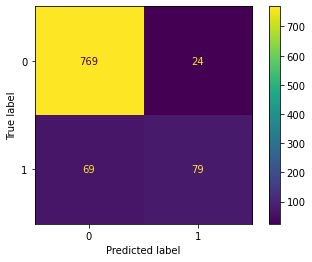

In [27]:
# Plot the Confusion Matrix
plot_confusion_matrix(logreg, X_train_scaled, y_train)

#### We need to check for class imbalance with the data.

In [28]:
y_train.value_counts()

0    793
1    148
Name: winners, dtype: int64

### Use SMOTE to resolve class imbalance

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2021)

In [30]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
y_train_res.value_counts()

1    793
0    793
Name: winners, dtype: int64

## Second Model - Logistic Regression with SMOTE applied

In [31]:
# Instantiate second LogisticRegression
logreg2 = LogisticRegression(solver='liblinear')
logreg2.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

### Second model output vs. first model output

In [32]:
# Call second modeling function
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.9022698612862547
Validation accuracy:  0.89171974522293


In [33]:
# Call modeling function
logreg = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy:  0.9011689691817216
Validation accuracy:  0.8757961783439491


#### The second model has IMPROVED accuracy after resolving class imbalance. The second model is now our best performing model.

### Plot the Confusion Matrix for the second model.

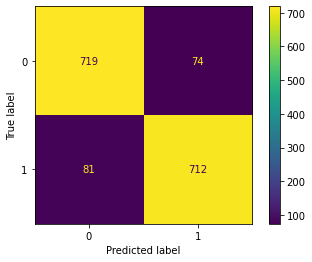

In [34]:
# Plot the Confusion Matrix
plot_confusion_matrix(logreg2, X_train_res, y_train_res)

## Third Model - Logistic Regression with SMOTE, penalty = 'l1' (Lasso) and C = 0.2

In [35]:
# Instantiate third LogisticRegression
logreg3 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.2)

### Third model output vs. second model output

In [36]:
# Call third modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8965952080706179
Validation accuracy:  0.8949044585987261


In [37]:
# Call second modeling function
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.9022698612862547
Validation accuracy:  0.89171974522293


#### The third model has improved accuracy even more after changing the model to Lasso Regression and setting C = 0.2. The third model is now our best performing model.

### Plot the Confusion Matrix for the third model.

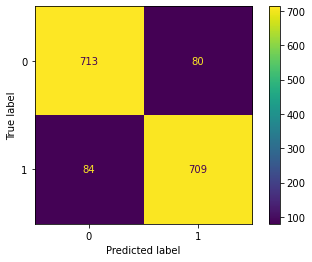

In [38]:
# Plot the Confusion Matrixb
plot_confusion_matrix(logreg3, X_train_res, y_train_res)

## Fourth Model - DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(random_state=2021)

### Fourth model output vs. third model output

In [40]:
# Call fourth modeling function
dt = modeling_function(dt, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  1.0
Validation accuracy:  0.8630573248407644


In [41]:
# Call third modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8965952080706179
Validation accuracy:  0.8949044585987261


#### The fourth model has excellent training accuracy, but it's significantly further away from validation accuracy. This model is more likely to suffer from overfitting and the third model is still our best performing model.

### Let's set the max_depth = 8 and see if our model has a better performance.

In [42]:
dt2 = DecisionTreeClassifier(random_state=2021, max_depth=8)

In [43]:
dt2 = modeling_function(dt2, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.9747793190416141
Validation accuracy:  0.8535031847133758


#### The training accuracy is closer to the validation accuracy now, but they're still significantly further away from each other. The third model is still our best performing model.

## Fifth Model - RandomForestClassifier

In [44]:
rf = RandomForestClassifier(random_state=2021)

### Fifth model output vs. third model output

In [45]:
# Call fifth modeling function
rf = modeling_function(rf, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  1.0
Validation accuracy:  0.8853503184713376


In [46]:
# Call third modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8972257250945775
Validation accuracy:  0.8949044585987261


#### The training accuracy is excellent, but it's significantly further away from validation accuracy. However, it performs better than the first decision tree model. The third model is still our best performing model.

I am going to try a GridSearch to experiment with some hyperparameters. I want to prevent overfitting so I am going to adjust `n_estimators`, `criterion`, `max_depth` and `min_samples_leaf`

In [47]:
# Create Param Grid 
param_grid = {'n_estimators': [50, 75, 100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [1, 3, 5, 7, 9, 10],
              'min_samples_leaf': [1, 3, 5, 7]}

In [48]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [49]:
rf_gs.fit(X_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

Now I can make predictions using this best estimator and see how it performs compared to previous models.

In [50]:
best_model = rf_gs.best_estimator_

In [51]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 50}

### GridSearchCV model output vs. third model output

In [52]:
# Call GridSearchCV modeling function
modeling_function(best_model, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.9943253467843631
Validation accuracy:  0.8853503184713376


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2021)

In [53]:
# Call third modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8965952080706179
Validation accuracy:  0.8949044585987261


#### The GridSearchCV model has little changes to training accuracy and no change to validation accuracy. The third model is still our best performing model.

## Sixth Model - KNeighborsClassifier `k=9`

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

### Sixth model output vs. third model output

In [55]:
# Call sixth modeling function
knn = modeling_function(knn, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8978562421185372
Validation accuracy:  0.6719745222929936


In [56]:
# Call third modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8978562421185372
Validation accuracy:  0.8949044585987261


#### The sixth model's training accuracy is closer to the third model's training accuracy. However, validation accuracy is much lower than before and is our worst performing model. The third model is still our best performing model.

## Seventh Model - Support Vector Machine with `kernel = 'linear'` and `C = 0.1`

In [57]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.1)

In [58]:
# Call seventh modeling function
svm = modeling_function(svm, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8940731399747793
Validation accuracy:  0.8949044585987261


In [74]:
# Call third modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8965952080706179
Validation accuracy:  0.8949044585987261


#### With our seventh model, we find both our training accuracy and validation accuracy to be 0.894. This model performs slightly better than the third model as shown above. Now our seventh model is our best performing model.

### Plot the Confusion Matrix for the seventh model

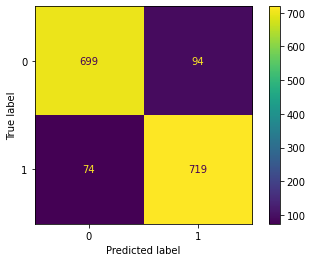

In [60]:
# Plot the Confusion Matrix
plot_confusion_matrix(svm, X_train_res, y_train_res)

## Testing Data with our best model - the Support Vector Machine model

In [61]:
# Transform SCALED test data and convert to DataFrame
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

In [62]:
X_test_scaled.shape

(419, 15)

In [63]:
# Get the predicted values for testing data
test_preds = svm.predict(X_test_scaled)

In [64]:
# Accuracy score for testing data
print('Testing accuracy: ', accuracy_score(y_test, test_preds))

Testing accuracy:  0.8949880668257757


In [65]:
# Call seventh modeling function
svm = modeling_function(svm, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.8940731399747793
Validation accuracy:  0.8949044585987261


#### Based on the output above, we can see that our accuracies for testing, training, and validation are all 0.894.

## Bar Plots, Strip Plot, and Box Plot for relationship between 'year' and 'points'. And 'winners' is the hue.

<AxesSubplot:xlabel='year', ylabel='points'>

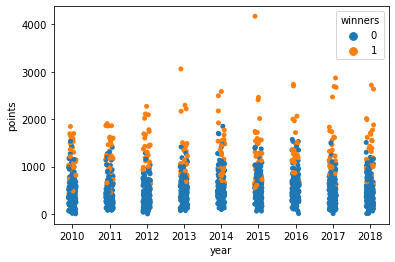

In [66]:
sns.stripplot(y = df['points'], x = df['year'], hue=df['winners'])

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


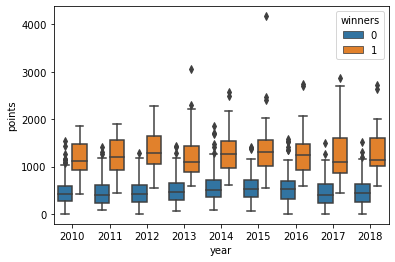

In [67]:
box = sns.boxplot('year', 'points', 'winners', data=df);

<AxesSubplot:xlabel='winners', ylabel='points'>

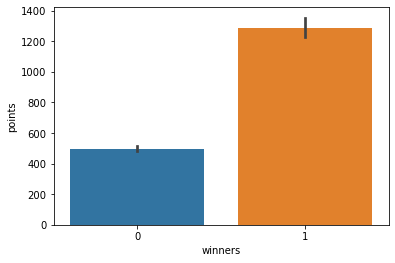

In [68]:
sns.barplot(x = df['winners'], y = df['points'])

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winners', ylabel='count'>

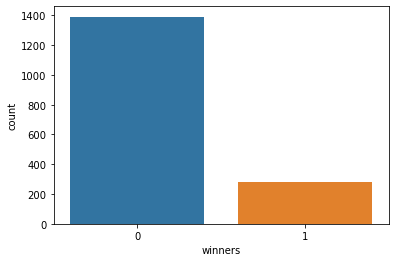

In [69]:
sns.countplot(df['winners'])

## Bar Plots, Strip Plot, and Box Plot for relationship between 'year' and 'money'. And 'winners' is the hue.

<AxesSubplot:xlabel='year', ylabel='money'>

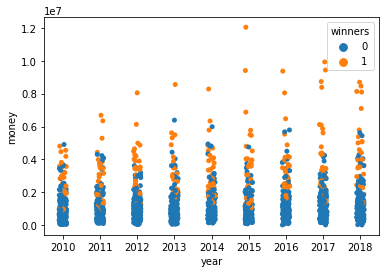

In [70]:
sns.stripplot(y = df['money'], x = df['year'], hue=df['winners'])

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


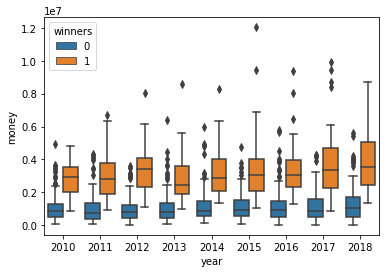

In [71]:
box2 = sns.boxplot('year', 'money', 'winners', data=df);

<AxesSubplot:xlabel='winners', ylabel='money'>

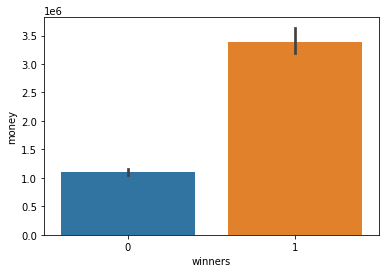

In [72]:
sns.barplot(x = df['winners'], y = df['money'])

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winners', ylabel='count'>

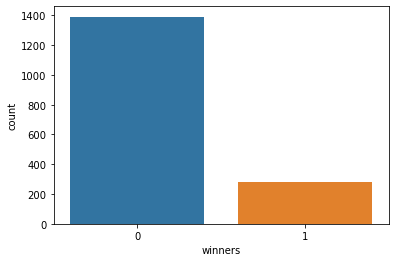

In [73]:
sns.countplot(df['winners'])